# Etivity 1: _Exploratory Data Analysis (EDA)_
**Student Name**: _Thomas Kiely_

**Student ID**: _17185203_

In [2]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create pandas dataframe from the bank dataset
df = pd.read_csv('./bank.csv')

# A. Formulate a particular question that might be interesting to answer by exploring this dataset
## Q: Does the client's Education Level & Balance affect the chance of them subscribing to a term deposit

In [4]:
# Display last 5 rows of the bank dataframe
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [5]:
# Display last 5 rows of the bank dataframe
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [6]:
# Print the dimensions of the bank dataframe
df.shape

(2000, 17)

From the above cells, we can see that the dataframe contains 2000 rows, each with 17 data columns representing the data attributes from the dataset. This dataset contains both numerical and categorical data attributes.

 


# B. Calculate statistics for the numerical and categorical attributes.

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


`describe()` is used here to display statistics for the numerical data attributes in the datatset.\
There are a few inferences we can draw by looking at the output of `describe()`:

- `age` has (2000 – 1988) 12 missing values.
-  All other numerical attributes have no missing values

We can also get an idea of a possible skew in the data by comparing the mean to the median. The median of each numerical attribute is the 50% figure.

<AxesSubplot:>

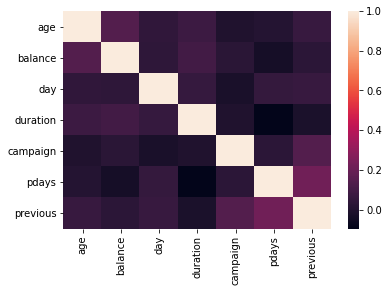

In [8]:
sns.heatmap(df.corr())

There are a some observations we can make from the above heatmap

- There is a correlation greater than 0 between `age` and `balance`
- There is a correlation greater than 0 between `pdays` and `previous`
- There is a small correlation slighly larger than 0 between `campaign` and `previous`

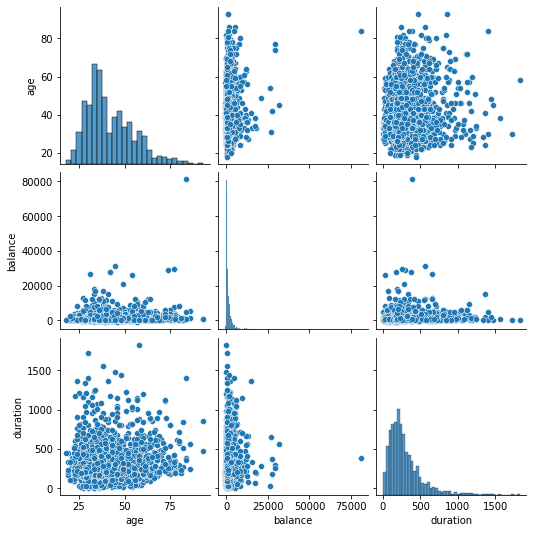

In [9]:
sns.pairplot(data=df[['age','balance','duration']].dropna())
plt.show()

From the above graphs we can make some observations

- The `age` of clients are most commonly between 25 and 50
- There is a significant outlier in `balance`, which is found in an older client
- Client `balance` most commonly is in the 0 to 25,000 range
- `Duration` is most commonly between 0 and 500

In [10]:
df.isnull().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

`df.isnull().sum()` is used here to display statistics for the categorical attributes in the datatset.\
There are a few inferences we can draw by looking at the output of `df.isnull().sum()`:

- `age` has 12 missing values.
- `job` has 10 missing values.
- `education` has 104 missing values.
- `contact` has 191 missing values.
- `poutcome` has 454 missing values.


In [11]:
df['subscribed'].value_counts()

no     1000
yes    1000
Name: subscribed, dtype: int64

In this dataset, 1000 clients are subscribers and 1000 are not subscribed. This is siplit perfectly in half across the 2000 clients

# C. Use at least two different plotting techniques to plot the distribution of some numerical attributes.

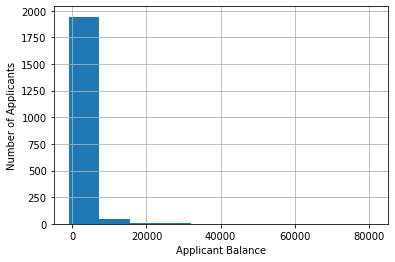

In [12]:
df['balance'].hist()
plt.xlabel('Applicant Balance')
plt.ylabel('Number of Applicants')
plt.show()

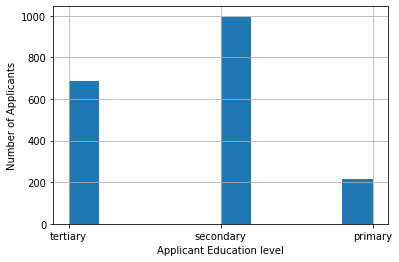

In [14]:
df['education'].hist()
plt.xlabel('Applicant Education level')
plt.ylabel('Number of Applicants')
plt.show()

The above histogram shows the following

- 1000 clients have a secondary education level
- Over 600 clients have a tertiary education
- Just over 200 clients have a primary education

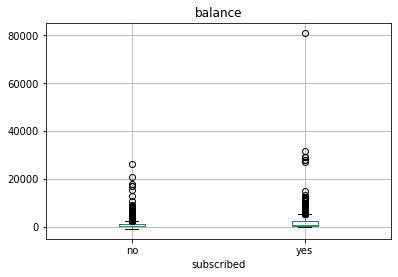

In [14]:
df.boxplot(column='balance', by='subscribed')
plt.suptitle("")
plt.show()

The above boxplot shows the balance of those who subscribed to the term deposit and those that did not subscribe.\
We can also see that extreme values are present in the balance of the subscribers

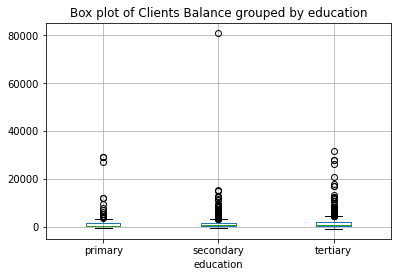

In [29]:
df.boxplot(column='balance', by='education')
plt.title('Box plot of Clients Balance grouped by education')
plt.suptitle("")
plt.show()

The above boxplot shows:

- The largest number of Clients that have gone through secondary education most commonly have a balance between 0-20,000
- An extreme outlier is present in the secondary education column with one client balance being over 80,000


# D. Generate two plots with the combined distribution of attributes and draw conclusions from them 

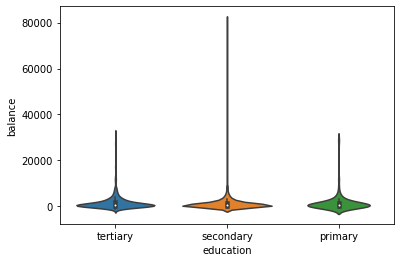

In [30]:
sns.violinplot(data=df, x='education', y='balance')
plt.show()

In the above graph we see the distribution of the client balances based on their education level.\
Tertiary and primary educated clients have a similar balance distribution where as we can see the secondary-educated lients contain outliers with the highest client balance found in this group.

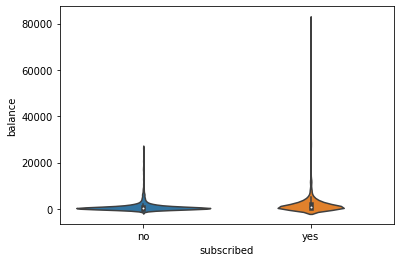

In [31]:
sns.violinplot(data=df, x='subscribed', y='balance')
plt.show()

In the above graph we can see the subscribers have a wider balance distribution than the non-subscribers. Clients with a higher balance are more likely to have subscribed. 

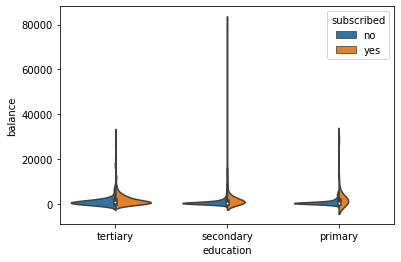

In [32]:
sns.violinplot(data=df, x='education', y='balance', hue='subscribed', split=True)
plt.show()

There are a number of inferences we can take from the above graph
- Subscribers with a primary education are more evenly distributed than\
non-subscribers with a primary education
- Subscribers with a secondary education are more evenly distributed than\
non-subscribers with a secondary education
- Subscribers with a tertiary education are more evenly distributed than\
non-subscribers with a tertiary education although the distribution here is  more similar\


<AxesSubplot:xlabel='education', ylabel='balance'>

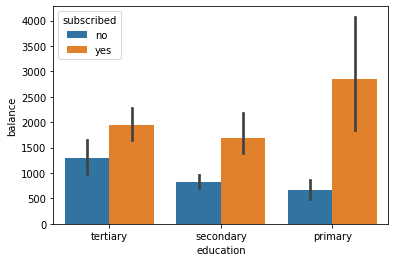

In [33]:
sns.barplot(hue='subscribed', x='education', y='balance', data=df)

Across the education levels of the individuals, we see that a higher balance of individuals have subscribed.\
We can clearly see a higher average balance in primary-educated individuals, followed by tertiary and secondary education.

- Clients with a tertiary education who subscribed had a higher average balance than those with a tertiary education that did not subscribe
- Clients with a secondary education who subscribed had a higher average balance than those with a secondary education that did not subscribe
- Clients with a primary education who subscribed had a higher average balance than those with a primary education that did not subscribe
- The highest average balance can be seen in clients with a primary education
- Tertiary educated and secondary educated clients have a similar average balance with tertiary educated clients having a slightly higher balance 

# E. Conclusions & Findings

From this analysis task I have made some findings related to my question:
#### Does the client's Education Level & Balance affect the chance of them subscribing to a term deposit

- Subscribers have a wider balance distribution than the non-subscribers. 
- Clients with a higher balance are more likely to have subscribed.
- Higher balance clients in each education level are more likely to have subscribed.
- Subscribers in each education level have more evenly distributed balances than non-subscribers